## Get user id list and count

In [21]:
# all_play_log file
# ! head -10 ../data/play/all_play_log
!cat ../data/play/all_play_log | head -10

168550892	ar	23491655	0	裂心	林志炫	254	254	0 	 20170330
168540455	ar	298250	0	See You Again	Miley Cyrus	189	190	0 	 20170330
168551247	ar	11881432	0	一梦浮生	颜淡妖妖	78	149	0 	 20170330
168549788	ip	295469	0	凡人歌	高胜美	16	242	0 	 20170330
168551248	ip	21393368	0	重生（Intro）	幼稚园杀手	87	87	0 	 20170330
168550496	ar	12495422	0	收好，你们要的高中数学课	3D奇妙听觉馆	369	2747	0 	 20170330
168551331	ar	20671171	0	Shape Of You	Ed Sheeran	231	231	0 	 20170330
168535490	ar	6616004	0	大雨还在下(DJ版)	DJ舞曲	283	283	0 	 20170330
168539760	ar	4732048	0	哦想(舞曲版 Dj Pw Remix)	安与骑兵	197	198	0 	 20170330
168551373	ar	3378911	0	为情所伤	庄心妍	14	212	0 	 20170330
cat: stdout: Broken pipe


In [22]:
!cat ../data/play/all_play_log | wc -l

 146336058


In [23]:
# use shell script to count unique id (large file, slow)
import os
cmd="""
export LC_CTYPE=C 
export LANG=C
# get uid field| sort | count unique ids | strip blank spaces | output to file
cat ../data/play/all_play_log| cut -f1 -d$'\t'| sort | uniq -c | sed -e 's/^ *//g;s/ *$//g'> ../data/uid_count.csv
"""
os.system(cmd)

0

In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('../data/uid_count.csv',sep='\s+', names=['count','uid'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96637 entries, 0 to 96636
Data columns (total 2 columns):
count    96637 non-null int64
uid      96637 non-null int64
dtypes: int64(2)
memory usage: 1.5 MB


In [27]:
df.describe()

,count,uid
count,96637.000000,9.663700e+04
mean,11.948343,1.675307e+08
std,85.871190,1.145086e+07
min,1.000000,0.000000e+00
25%,2.000000,1.686227e+08
50%,6.000000,1.687421e+08
75%,14.000000,1.688350e+08
max,15656.000000,1.689411e+08


## Remove bots and outliers

In [28]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

Text(0.5,0,'user # plays (10^n)')

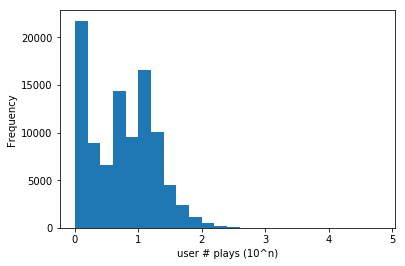

In [29]:
np.log10(df['count']).plot.hist(bins=np.arange(0,5,0.2))
plt.xlabel("user # plays (10^n)")
plt.show()

In [30]:
top_count_threshold = np.percentile(df['count'],99.9)
print(top_count_threshold)

279.7280000000319


In [31]:
print("total number of users:",len(df['uid']))

total number of users: 96637


In [32]:
# remove bots: get id with play counts<top_count_threshold
id_list_bot_removed = np.array(df['uid'][df['count']<top_count_threshold].dropna())

In [33]:
print("total number of users after bot removed:",len(id_list_bot_removed))

total number of users after bot removed: 96540


# Apply downsample on uid level

In [13]:
# downsample ids
np.random.seed = 1
id_subset = set(id_list_bot_removed[np.random.random(id_list_bot_removed.shape)<0.1])

In [14]:
print("total number of users after down sample:",len(id_subset))

total number of users after down sample: 9757


In [15]:
# define date conversion function
import datetime
def convert_date(s):
    s = str(s).strip()
    try:
        year = int(s[:4])
        month = int(s[4:6])
        day = int(s[6:8])
        return datetime.date(year,month,day)
    except:
        return None

In [16]:
# down sample play by uid
import csv
input_file = '../data/play/all_play_log'
output_file = '../data/play_ds.csv'
input_field_list = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag','date']
output_field_list = ['uid','device','song_id','date','play_time','song_length']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])

#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000
#row processed: 8000000
#row processed: 9000000
#row processed: 10000000
#row processed: 11000000
#row processed: 12000000
#row processed: 13000000
#row processed: 14000000
#row processed: 15000000
#row processed: 16000000
#row processed: 17000000
#row processed: 18000000
#row processed: 19000000
#row processed: 20000000
#row processed: 21000000
#row processed: 22000000
#row processed: 23000000
#row processed: 24000000
#row processed: 25000000
#row processed: 26000000
#row processed: 27000000
#row processed: 28000000
#row processed: 29000000
#row processed: 30000000
#row processed: 31000000
#row processed: 32000000
#row processed: 33000000
#row processed: 34000000
#row processed: 35000000
#row processed: 36000000
#row processed: 37000000
#row processed: 38000000
#row processed: 39000000
#row processed: 40000000
#row proc

In [19]:
# down sample download by uid
import csv
input_file = '../data/down/all_down_log'
output_file = '../data/down_ds.csv'
input_field_list = ['uid','device','song_id','song_name','singer','paid_flag','date']
output_field_list = ['uid','device','song_id','date']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])


#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000


In [18]:
# down sample search by uid  
import csv
input_file = '../data/search/all_search_log'
output_file = '../data/search_ds.csv'
input_field_list = ['uid','device','time_stamp','search_query','date']
output_field_list = ['uid','device','date']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])


#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000
#row processed: 8000000


# Create event table for feature generation

In [20]:
play_file = '../data/play_ds.csv'
down_file = '../data/down_ds.csv'
search_file = '../data/search_ds.csv'
output_file = '../data/event_ds.csv'
play_field_list = ['uid','device','song_id','date','play_time','song_length']
down_field_list = ['uid','device','song_id','date']
search_field_list = ['uid','device','date']
output_field_list = ['uid','event','song_id','date']
with open(play_file,'r') as f_play, open(down_file,'r') as f_down, \
open(search_file,'r') as f_search,open(output_file,'w') as f_out:
    csvplay = csv.DictReader(f_play,delimiter=',')
    csvdown = csv.DictReader(f_down,delimiter=',')
    csvsearch = csv.DictReader(f_search,delimiter=',')
    csvout = csv.writer(f_out,delimiter=',')
    csvout.writerow(output_field_list) # write header
    print('Processing play ...')
    for row in csvplay:
        row['event'] = 'P'
        row['date']
        csvout.writerow([row[key] for key in output_field_list])
    print('Processing down ...')
    for row in csvdown:
        row['event'] = 'D'
        csvout.writerow([row[key] for key in output_field_list])
    print('Processing search ...')
    for row in csvsearch:
        row['event'] = 'S'
        csvout.writerow([row.get(key,'') for key in output_field_list])


Processing play ...
Processing down ...
Processing search ...
